# 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [46]:
h = ['ID', 'class']
for i in range(1,31):
    h.append('feature'+str(i))
df = pd.read_csv('../data/wdbc.data',names = h) 

In [47]:
df = df. drop(columns = ['ID'])

In [48]:
df.replace(['B','M'],[0,1],inplace = True)

## b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

In [327]:
def nomalization (x_train,x_test):
    scaler = StandardScaler()
    x_train_norm = pd.DataFrame(scaler.fit_transform(x_train))
    x_test_norm = pd.DataFrame(scaler.transform(x_test))
    return x_train_norm,x_test_norm

In [315]:
all_M_dict = {}
for M in range(30):
    M_dict = {}
    x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']),df['class'],
                                                    test_size = 0.2,stratify = df['class'],random_state = M)
    #x_train, x_test = nomalization (x_train,x_test)
    M_dict ['x_train'] = x_train
    M_dict ['x_test'] = x_test
    M_dict ['y_train'] = y_train
    M_dict ['y_test'] = y_test
    all_M_dict[M] = M_dict

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [8]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [9]:
def L1SVM (x_train,y_train,x_test):
    clf = svm.LinearSVC(penalty = 'l1', dual=False)
    C_list = []
    k = range(-3,6)#-3,6
    for i in k:
        C_list.append(10**(i))
    params = {'C':C_list}
    grid = GridSearchCV(svm.LinearSVC(penalty = 'l1', dual=False), param_grid = params, cv = 5)
    grid.fit(x_train, y_train)    
    pred = grid.predict(x_test)
    optimal_estimator = grid.best_estimator_
    optimal_params = grid.best_params_
    print(grid.best_estimator_)
    #print(optimal_params)
    return pred

In [10]:
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score,roc_auc_score,confusion_matrix

In [11]:
t_accuracy_l = []
t_precision_l=[]
t_recall_l=[]
t_F1_score_l=[]
t_AUC_l= []


accuracy_l = []
precision_l= []
recall_l= []
F1_score_l= []
AUC_l=[]

for M in range(30):
    print ('try:',M+1)
    
    x_train = all_M_dict[M]['x_train']
    y_train = all_M_dict[M]['y_train']
    x_test = all_M_dict[M]['x_test']
    y_test = all_M_dict[M]['y_test']
    x_train_norm,x_test_norm = nomalization(x_train,x_test)
    
    t_pred = L1SVM (x_train_norm,y_train,x_train_norm)
    pred = L1SVM (x_train_norm,y_train,x_test_norm)
    
    t_accuracy = accuracy_score (y_train,t_pred)
    t_precision=precision_score (y_train,t_pred)
    t_recall= recall_score (y_train,t_pred)
    t_F1_score= f1_score (y_train,t_pred)
    t_AUC= roc_auc_score (y_train,t_pred)
    t_confusion = confusion_matrix (y_train,t_pred)
    
    accuracy = accuracy_score (y_test,pred)
    precision=precision_score (y_test,pred)
    recall= recall_score (y_test,pred)
    F1_score= f1_score (y_test,pred)
    AUC= roc_auc_score (y_test,pred)
    confusion = confusion_matrix(y_test,pred)
    
    print ('training test_accuracy: ',t_accuracy)
    print('training_precision:',t_precision)
    print ('training_recall:',t_recall)
    print ('training_F1_score:',t_F1_score)
    print ('training_AUC:',AUC)
    print ('---')
    
    t_accuracy_l.append (t_accuracy)
    t_precision_l.append (t_precision)
    t_recall_l.append (t_recall)
    t_F1_score_l.append (t_F1_score)
    t_AUC_l.append (t_AUC)
    
    print ('test_accuracy: ',accuracy)
    print('test_precision:',precision)
    print ('test_recall:',recall)
    print ('test_F1_score:',F1_score)
    print ('test_AUC:',AUC)
    print ('------------------------------')
    
    
    accuracy_l.append (accuracy)
    precision_l.append (precision)
    recall_l.append (recall)
    F1_score_l.append ( F1_score)
    AUC_l.append (AUC)

try: 1
LinearSVC(C=0.1, dual=False, penalty='l1')
LinearSVC(C=0.1, dual=False, penalty='l1')
training test_accuracy:  0.9912087912087912
training_precision: 0.9940476190476191
training_recall: 0.9823529411764705
training_F1_score: 0.9881656804733727
training_AUC: 0.9553571428571429
---
test_accuracy:  0.956140350877193
test_precision: 0.9302325581395349
test_recall: 0.9523809523809523
test_F1_score: 0.9411764705882352
test_AUC: 0.9553571428571429
------------------------------
try: 2
LinearSVC(C=1, dual=False, penalty='l1')
LinearSVC(C=1, dual=False, penalty='l1')
training test_accuracy:  0.9868131868131869
training_precision: 0.9880952380952381
training_recall: 0.9764705882352941
training_F1_score: 0.9822485207100591
training_AUC: 0.9811507936507938
---
test_accuracy:  0.9824561403508771
test_precision: 0.9761904761904762
test_recall: 0.9761904761904762
test_F1_score: 0.9761904761904762
test_AUC: 0.9811507936507938
------------------------------
try: 3
LinearSVC(C=0.1, dual=False, pen

LinearSVC(C=0.1, dual=False, penalty='l1')
LinearSVC(C=0.1, dual=False, penalty='l1')
training test_accuracy:  0.9824175824175824
training_precision: 0.9879518072289156
training_recall: 0.9647058823529412
training_F1_score: 0.9761904761904762
training_AUC: 0.9811507936507938
---
test_accuracy:  0.9824561403508771
test_precision: 0.9761904761904762
test_recall: 0.9761904761904762
test_F1_score: 0.9761904761904762
test_AUC: 0.9811507936507938
------------------------------
try: 20
LinearSVC(C=1, dual=False, penalty='l1')
LinearSVC(C=1, dual=False, penalty='l1')
training test_accuracy:  0.9956043956043956
training_precision: 0.9941176470588236
training_recall: 0.9941176470588236
training_F1_score: 0.9941176470588236
training_AUC: 0.9642857142857143
---
test_accuracy:  0.9736842105263158
test_precision: 1.0
test_recall: 0.9285714285714286
test_F1_score: 0.962962962962963
test_AUC: 0.9642857142857143
------------------------------
try: 21
LinearSVC(C=0.1, dual=False, penalty='l1')
LinearSVC

In [12]:
t_SL = {}
t_SL ['AVE_accuracy'] = np.mean(t_accuracy_l)
t_SL['AVE_precision']=np.mean(t_precision_l)
t_SL['AVE_recall']=np.mean(t_recall_l)
t_SL['AVE_F1_score']=np.mean(t_F1_score_l)
t_SL['AVE_AUC']=np.mean(t_AUC_l)

print ('Supervised Learning report over training set',t_SL)

SL = {}
SL ['AVE_accuracy'] = np.mean(accuracy_l)
SL['AVE_precision']=np.mean(precision_l)
SL['AVE_recall']=np.mean(recall_l)
SL['AVE_F1_score']=np.mean(F1_score_l)
SL['AVE_AUC']=np.mean(AUC_l)

print ('Supervised Learning report over test set',SL)

Supervised Learning report over training set {'AVE_accuracy': 0.9872527472527473, 'AVE_precision': 0.992217601465984, 'AVE_recall': 0.9735294117647056, 'AVE_F1_score': 0.982763762507396, 'AVE_AUC': 0.9844840041279672}
Supervised Learning report over test set {'AVE_accuracy': 0.9669590643274851, 'AVE_precision': 0.9729060135469664, 'AVE_recall': 0.9373015873015871, 'AVE_F1_score': 0.9542767230988318, 'AVE_AUC': 0.9607804232804233}


In [13]:
index = accuracy_l.index(max(accuracy_l))
x_train = all_M_dict[index]['x_train']
y_train = all_M_dict[index]['y_train']
x_test = all_M_dict[index]['x_test']
y_test = all_M_dict[index]['y_test']
x_train_norm,x_test_norm = nomalization(x_train,x_test)
pred = L1SVM (x_train_norm,y_train,x_test_norm)
accuracy = accuracy_score (y_test,pred)
precision=precision_score (y_test,pred)
recall= recall_score (y_test,pred)
F1_score= f1_score (y_test,pred)
AUC= roc_auc_score (y_test,pred)
confusion = confusion_matrix(y_test,pred)
print ('accuracy: ',accuracy)
print('precision:',precision)
print ('recall:',recall)
print ('F1_score:',F1_score)
print ('AUC:',AUC)
print ('confusion matrix:')
print (confusion)

LinearSVC(C=0.1, dual=False, penalty='l1')
accuracy:  0.9912280701754386
precision: 1.0
recall: 0.9761904761904762
F1_score: 0.9879518072289156
AUC: 0.9880952380952381
confusion matrix:
[[72  0]
 [ 1 41]]


0.000000 0.000000 2.000000
0.000000 0.976190 1.000000
1.000000 1.000000 0.000000


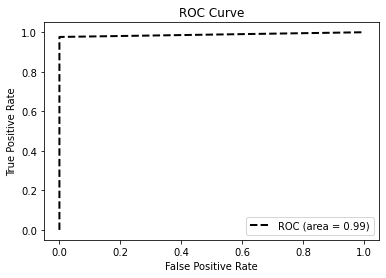

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_label,y_pre = (y_test,pred)
fpr, tpr, thersholds = roc_curve(y_label, y_pre)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A)Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [15]:
def split_pos_neg(x,y):
    # parameter type: x:pandas.core.frame.DataFrame , y: pandas.core.series.Series
    df = pd.concat([x,y],axis = 1)
    df_pos = df.loc[df['class']== 1]
    df_neg = df.loc[df['class']== 0]
    pos_1 = df_pos.sample(frac=0.5)
    pos_2=df_pos[~df_pos.index.isin(pos_1.index)]
    neg_1 = df_neg.sample(frac=0.5)
    neg_2=df_neg[~df_neg.index.isin(neg_1.index)]
    labeled_data = pd.concat([pos_1,neg_1])
    unlabeled_data = pd.concat([pos_2,neg_2])
    x_labeled = labeled_data.drop(columns = ['class'])
    y_labeled = labeled_data['class']
    x_unlabeled = unlabeled_data.drop(columns = ['class'])
    y_unlabeled = unlabeled_data['class']
    print()
    return x_labeled, y_labeled, x_unlabeled, y_unlabeled

In [16]:
def semi_svm (x_train_labeled,y_train_labeled, x_train_unlabeled):
    
    y_train_labeled = y_train_labeled.tolist()
    clf = svm.LinearSVC(penalty = 'l1', dual=False)
    C_list = []
    k = range(-3,6)#-3,6
    for i in k:
        C_list.append(10**(i))
    
    
    while len(x_train_unlabeled) >0:
        params = {'C':C_list}
        grid = GridSearchCV(svm.LinearSVC(penalty = 'l1', dual=False), param_grid = params, cv = 5) 
        grid.fit(x_train_labeled, y_train_labeled)
        scores = abs(grid.decision_function(x_train_unlabeled))
        pred = grid.predict(x_train_unlabeled)
        for i in (-scores).argsort()[:1]:
            x_loc= i
        x_train_labeled = x_train_labeled.append(x_train_unlabeled.iloc[x_loc])
        y_train_labeled.append(pred[x_loc])
        x_train_unlabeled = x_train_unlabeled.drop(labels = x_train_unlabeled.index[x_loc],inplace=False)
        grid.best_estimator_.fit(x_train_labeled,y_train_labeled)
    return grid

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [17]:
t_accuracy_l = []
t_precision_l=[]
t_recall_l=[]
t_F1_score_l=[]
t_AUC_l= []


accuracy_l = []
precision_l= []
recall_l= []
F1_score_l= []
AUC_l=[]

for M in range(30):
    print ('try:',M+1)
    x_train = all_M_dict[M]['x_train']
    y_train = all_M_dict[M]['y_train']
    x_test = all_M_dict[M]['x_test']
    y_test = all_M_dict[M]['y_test']
    #x_train, x_test = nomalization(x_train,x_test)
    x_train_labeled, y_train_labeled, x_train_unlabeled, y_train_unlabeled = split_pos_neg(x_train,y_train)
    semi_svm(x_train_labeled, y_train_labeled, x_train_unlabeled)
    clf = semi_svm(x_train_labeled, y_train_labeled,x_train_unlabeled)
    t_pred = clf.predict(x_train)
    pred = clf.predict(x_test)
    
    t_accuracy = accuracy_score (y_train,t_pred)
    t_precision=precision_score (y_train,t_pred)
    t_recall= recall_score (y_train,t_pred)
    t_F1_score= f1_score (y_train,t_pred)
    t_AUC= roc_auc_score (y_train,t_pred)
    t_confusion = confusion_matrix (y_train,t_pred)
    
    accuracy = accuracy_score (y_test,pred)
    precision=precision_score (y_test,pred)
    recall= recall_score (y_test,pred)
    F1_score= f1_score (y_test,pred)
    AUC= roc_auc_score (y_test,pred)
    confusion = confusion_matrix(y_test,pred)
    
    print ('training test_accuracy: ',t_accuracy)
    print('training_precision:',t_precision)
    print ('training_recall:',t_recall)
    print ('training_F1_score:',t_F1_score)
    print ('training_AUC:',AUC)
    print ('---')
    
    t_accuracy_l.append (t_accuracy)
    t_precision_l.append (t_precision)
    t_recall_l.append (t_recall)
    t_F1_score_l.append (t_F1_score)
    t_AUC_l.append (t_AUC)
    
    print ('test_accuracy: ',accuracy)
    print('test_precision:',precision)
    print ('test_recall:',recall)
    print ('test_F1_score:',F1_score)
    print ('test_AUC:',AUC)
    print ('------------------------------')
    
    
    accuracy_l.append (accuracy)
    precision_l.append (precision)
    recall_l.append (recall)
    F1_score_l.append ( F1_score)
    AUC_l.append (AUC)
    

try: 1

training test_accuracy:  0.9758241758241758
training_precision: 0.9649122807017544
training_recall: 0.9705882352941176
training_F1_score: 0.967741935483871
training_AUC: 0.9246031746031745
---
test_accuracy:  0.9298245614035088
test_precision: 0.9047619047619048
test_recall: 0.9047619047619048
test_F1_score: 0.9047619047619048
test_AUC: 0.9246031746031745
------------------------------
try: 2

training test_accuracy:  0.9802197802197802
training_precision: 0.9820359281437125
training_recall: 0.9647058823529412
training_F1_score: 0.973293768545994
training_AUC: 0.9623015873015873
---
test_accuracy:  0.9649122807017544
test_precision: 0.9523809523809523
test_recall: 0.9523809523809523
test_F1_score: 0.9523809523809523
test_AUC: 0.9623015873015873
------------------------------
try: 3

training test_accuracy:  0.978021978021978
training_precision: 0.9819277108433735
training_recall: 0.9588235294117647
training_F1_score: 0.9702380952380952
training_AUC: 0.9742063492063492
---
test_

training test_accuracy:  0.989010989010989
training_precision: 1.0
training_recall: 0.9705882352941176
training_F1_score: 0.9850746268656716
training_AUC: 0.9742063492063492
---
test_accuracy:  0.9736842105263158
test_precision: 0.9534883720930233
test_recall: 0.9761904761904762
test_F1_score: 0.9647058823529412
test_AUC: 0.9742063492063492
------------------------------
try: 23

training test_accuracy:  0.9736263736263736
training_precision: 0.9759036144578314
training_recall: 0.9529411764705882
training_F1_score: 0.9642857142857143
training_AUC: 0.9742063492063492
---
test_accuracy:  0.9736842105263158
test_precision: 0.9534883720930233
test_recall: 0.9761904761904762
test_F1_score: 0.9647058823529412
test_AUC: 0.9742063492063492
------------------------------
try: 24

training test_accuracy:  0.9736263736263736
training_precision: 0.9540229885057471
training_recall: 0.9764705882352941
training_F1_score: 0.9651162790697674
training_AUC: 0.9126984126984126
---
test_accuracy:  0.921052

In [18]:
t_SL = {}
t_SL ['AVE_accuracy'] = np.mean(t_accuracy_l)
t_SL['AVE_precision']=np.mean(t_precision_l)
t_SL['AVE_recall']=np.mean(t_recall_l)
t_SL['AVE_F1_score']=np.mean(t_F1_score_l)
t_SL['AVE_AUC']=np.mean(t_AUC_l)

print ('Supervised Learning report over training set',t_SL)

SL = {}
SL ['AVE_accuracy'] = np.mean(accuracy_l)
SL['AVE_precision']=np.mean(precision_l)
SL['AVE_recall']=np.mean(recall_l)
SL['AVE_F1_score']=np.mean(F1_score_l)
SL['AVE_AUC']=np.mean(AUC_l)

print ('Supervised Learning report over test set',SL)

Supervised Learning report over training set {'AVE_accuracy': 0.9739926739926741, 'AVE_precision': 0.9690241461084121, 'AVE_recall': 0.9615686274509804, 'AVE_F1_score': 0.9650866462612459, 'AVE_AUC': 0.971486068111455}
Supervised Learning report over test set {'AVE_accuracy': 0.9502923976608186, 'AVE_precision': 0.94152111689421, 'AVE_recall': 0.923015873015873, 'AVE_F1_score': 0.9316028530061147, 'AVE_AUC': 0.9446097883597883}



confusion matrix:
[[71  1]
 [ 3 39]]
0.000000 0.000000 2.000000
0.013889 0.928571 1.000000
1.000000 1.000000 0.000000


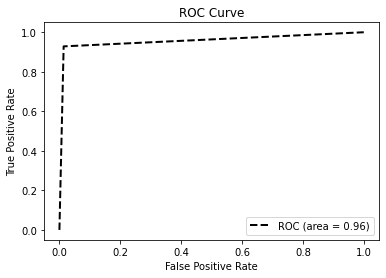

In [19]:
index = accuracy_l.index(max(accuracy_l))
x_train = all_M_dict[index]['x_train']
y_train = all_M_dict[index]['y_train']
x_test = all_M_dict[index]['x_test']
y_test = all_M_dict[index]['y_test']
x_train_labeled, y_train_labeled, x_train_unlabeled, y_train_unlabeled = split_pos_neg(x_train,y_train)
semi_svm(x_train_labeled, y_train_labeled, x_train_unlabeled)
clf = semi_svm(x_train_labeled, y_train_labeled,x_train_unlabeled)
t_pred = clf.predict(x_train)
pred = clf.predict(x_test)

confusion = confusion_matrix(y_test,pred)

print ('confusion matrix:')
print (confusion)




y_label,y_pre = (y_test,pred)
fpr, tpr, thersholds = roc_curve(y_label, y_pre)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?
#### B. Compute the centers of the two clusters and find the closest 30 datapoints to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.
#### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

We run the kmeans with different random state to avoid being trapped in a local minimum


In [394]:
for i in all_M_dict.values():
    i['x_train'],i['x_test'] = nomalization (i['x_train'],i['x_test'])
    i['x_train'].reset_index(drop = True, inplace = True)
    i['y_train'].reset_index(drop = True, inplace = True)

In [350]:
center0_list = []
center1_list = []

In [367]:
from collections import Counter

def get_maj (random_number,train_set,true_label):
    ## random_number: iteration of the loop
    ## train_set: pd DateFrame train_set without labels, index reseted
    
    
    train = train_set
    kmeans = KMeans(n_clusters=2,random_state=random_number)
    pred=kmeans.fit_predict(train)
    center = kmeans.cluster_centers_
        
    cluster0 = train[pred == 0]
    cluster1 = train[pred == 1]
        
    cluster0_dis = []
    cluster0_index = []
    cluster1_dis = []
    cluster1_index = []
        
    for i in range(cluster0.shape[0]):
        cluster0_dis.append((cluster0.index.tolist()[i],sum(abs(cluster0.iloc[i].tolist()-center[0]))))
        
    for i in range(cluster0.shape[1]):
        cluster1_dis.append((cluster1.index.tolist()[i],sum(abs(cluster1.iloc[i].tolist()-center[1]))))
            
    cluster0_dis.sort(key = lambda x: x[1])
    cluster0_dis = cluster0_dis[:30]
    cluster1_dis.sort(key = lambda x: x[1])
    cluster1_dis = cluster1_dis[:30]
    
    dis0_index = [i[0] for i in cluster0_dis]
    dis1_index = [i[0] for i in cluster1_dis]
    
    true_label = np.array(true_label)
    label_0 = Counter(true_label[dis0_index]).most_common()[0][0]
    label_1 = Counter(true_label[dis1_index]).most_common()[0][0]
    
    if label_0 != 0:
        for i,v in enumerate(pred):
            pred[i] = abs(v-1)
            center = center[::-1]
        if label_1 != 0:
            return(False)    
    return(pred)

In [368]:
t_accuracy_l = []
t_precision_l=[]
t_recall_l=[]
t_F1_score_l=[]
t_AUC_l= []




for M in range(30):
    print ('try:',M+1)
    x_train = all_M_dict[M]['x_train']
    y_train = all_M_dict[M]['y_train']
    x_test = all_M_dict[M]['x_test']
    y_test = all_M_dict[M]['y_test']
    for rs in range(10):
        print('random_state = ',rs)
        t_pred = get_maj (rs,x_train,y_train)
       
       
        
        t_accuracy = accuracy_score (y_train,t_pred)
        t_precision=precision_score (y_train,t_pred)
        t_recall= recall_score (y_train,t_pred)
        t_F1_score= f1_score (y_train,t_pred)
        t_AUC= roc_auc_score (y_train,t_pred)
        t_confusion = confusion_matrix (y_train,t_pred)
        
        print ('training test_accuracy: ',t_accuracy)
        print('training_precision:',t_precision)
        print ('training_recall:',t_recall)
        print ('training_F1_score:',t_F1_score)
        print ('training_AUC:',AUC)
        print ('---')
        
        t_accuracy_l.append (t_accuracy)
        t_precision_l.append (t_precision)
        t_recall_l.append (t_recall)
        t_F1_score_l.append (t_F1_score)
        t_AUC_l.append (t_AUC)

try: 1
random_state =  0
training test_accuracy:  0.9098901098901099
training_precision: 0.9448275862068966
training_recall: 0.8058823529411765
training_F1_score: 0.8698412698412699
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9098901098901099
training_precision: 0.9448275862068966
training_recall: 0.8058823529411765
training_F1_score: 0.8698412698412699
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9098901098901099
training_precision: 0.9448275862068966
training_recall: 0.8058823529411765
training_F1_score: 0.8698412698412699
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9098901098901099
training_precision: 0.9448275862068966
training_recall: 0.8058823529411765
training_F1_score: 0.8698412698412699
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9098901098901099
training_precision: 0.9448275862068966
training_recall: 0.8058823529411765
training

training test_accuracy:  0.9098901098901099
training_precision: 0.9161290322580645
training_recall: 0.8352941176470589
training_F1_score: 0.8738461538461538
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9098901098901099
training_precision: 0.9161290322580645
training_recall: 0.8352941176470589
training_F1_score: 0.8738461538461538
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9076923076923077
training_precision: 0.9155844155844156
training_recall: 0.8294117647058824
training_F1_score: 0.8703703703703705
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9098901098901099
training_precision: 0.9161290322580645
training_recall: 0.8352941176470589
training_F1_score: 0.8738461538461538
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9098901098901099
training_precision: 0.9161290322580645
training_recall: 0.8352941176470589
training_F1_score: 0.873846153846

training test_accuracy:  0.9076923076923077
training_precision: 0.9155844155844156
training_recall: 0.8294117647058824
training_F1_score: 0.8703703703703705
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9076923076923077
training_precision: 0.9155844155844156
training_recall: 0.8294117647058824
training_F1_score: 0.8703703703703705
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9076923076923077
training_precision: 0.9155844155844156
training_recall: 0.8294117647058824
training_F1_score: 0.8703703703703705
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9076923076923077
training_precision: 0.9155844155844156
training_recall: 0.8294117647058824
training_F1_score: 0.8703703703703705
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9076923076923077
training_precision: 0.9155844155844156
training_recall: 0.8294117647058824
training_F1_score: 0.870370370370

training test_accuracy:  0.9230769230769231
training_precision: 0.9354838709677419
training_recall: 0.8529411764705882
training_F1_score: 0.8923076923076922
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9252747252747253
training_precision: 0.9358974358974359
training_recall: 0.8588235294117647
training_F1_score: 0.8957055214723926
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9252747252747253
training_precision: 0.9358974358974359
training_recall: 0.8588235294117647
training_F1_score: 0.8957055214723926
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9252747252747253
training_precision: 0.9358974358974359
training_recall: 0.8588235294117647
training_F1_score: 0.8957055214723926
training_AUC: 0.8978174603174603
---
random_state =  5
training test_accuracy:  0.9252747252747253
training_precision: 0.9358974358974359
training_recall: 0.8588235294117647
training_F1_score: 0.895705521472

training test_accuracy:  0.9164835164835164
training_precision: 0.9459459459459459
training_recall: 0.8235294117647058
training_F1_score: 0.8805031446540881
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9164835164835164
training_precision: 0.9459459459459459
training_recall: 0.8235294117647058
training_F1_score: 0.8805031446540881
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9164835164835164
training_precision: 0.9459459459459459
training_recall: 0.8235294117647058
training_F1_score: 0.8805031446540881
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9164835164835164
training_precision: 0.9459459459459459
training_recall: 0.8235294117647058
training_F1_score: 0.8805031446540881
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9164835164835164
training_precision: 0.9459459459459459
training_recall: 0.8235294117647058
training_F1_score: 0.880503144654

training test_accuracy:  0.9076923076923077
training_precision: 0.9266666666666666
training_recall: 0.8176470588235294
training_F1_score: 0.86875
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9076923076923077
training_precision: 0.9266666666666666
training_recall: 0.8176470588235294
training_F1_score: 0.86875
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9076923076923077
training_precision: 0.9266666666666666
training_recall: 0.8176470588235294
training_F1_score: 0.86875
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9076923076923077
training_precision: 0.9266666666666666
training_recall: 0.8176470588235294
training_F1_score: 0.86875
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9076923076923077
training_precision: 0.9266666666666666
training_recall: 0.8176470588235294
training_F1_score: 0.86875
training_AUC: 0.8978174603174603
---
random_state 

training test_accuracy:  0.9054945054945055
training_precision: 0.9261744966442953
training_recall: 0.8117647058823529
training_F1_score: 0.865203761755486
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9054945054945055
training_precision: 0.9261744966442953
training_recall: 0.8117647058823529
training_F1_score: 0.865203761755486
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9054945054945055
training_precision: 0.9261744966442953
training_recall: 0.8117647058823529
training_F1_score: 0.865203761755486
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9054945054945055
training_precision: 0.9261744966442953
training_recall: 0.8117647058823529
training_F1_score: 0.865203761755486
training_AUC: 0.8978174603174603
---
random_state =  4
training test_accuracy:  0.9054945054945055
training_precision: 0.9261744966442953
training_recall: 0.8117647058823529
training_F1_score: 0.865203761755486


training test_accuracy:  0.9120879120879121
training_precision: 0.9391891891891891
training_recall: 0.8176470588235294
training_F1_score: 0.8742138364779873
training_AUC: 0.8978174603174603
---
try: 29
random_state =  0
training test_accuracy:  0.9120879120879121
training_precision: 0.922077922077922
training_recall: 0.8352941176470589
training_F1_score: 0.8765432098765432
training_AUC: 0.8978174603174603
---
random_state =  1
training test_accuracy:  0.9120879120879121
training_precision: 0.922077922077922
training_recall: 0.8352941176470589
training_F1_score: 0.8765432098765432
training_AUC: 0.8978174603174603
---
random_state =  2
training test_accuracy:  0.9120879120879121
training_precision: 0.922077922077922
training_recall: 0.8352941176470589
training_F1_score: 0.8765432098765432
training_AUC: 0.8978174603174603
---
random_state =  3
training test_accuracy:  0.9120879120879121
training_precision: 0.922077922077922
training_recall: 0.8352941176470589
training_F1_score: 0.87654320

In [400]:
t_SL = {}
t_SL ['AVE_accuracy'] = np.mean(t_accuracy_l)
t_SL['AVE_precision']=np.mean(t_precision_l)
t_SL['AVE_recall']=np.mean(t_recall_l)
t_SL['AVE_F1_score']=np.mean(t_F1_score_l)
t_SL['AVE_AUC']=np.mean(t_AUC_l)

print ('Unsupervised Learning report over training set',t_SL)

Unsupervised Learning report over training set {'AVE_accuracy': 0.6296479031172907, 'AVE_precision': 0.8979591836734694, 'AVE_recall': 0.009363745498199278, 'AVE_F1_score': 0.018523606913185508, 'AVE_AUC': 0.5045028537730882}


confusion matrix:
[[272  13]
 [ 29 141]]
0.000000 0.000000 2.000000
0.045614 0.829412 1.000000
1.000000 1.000000 0.000000


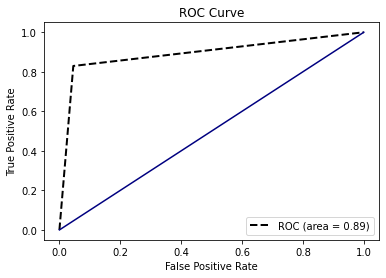

In [370]:
index = 3
x_train = all_M_dict[index]['x_train']
y_train = all_M_dict[index]['y_train']
x_test = all_M_dict[index]['x_test']
y_test = all_M_dict[index]['y_test']

pred = get_maj (3,x_train,y_train)


confusion = confusion_matrix(y_train,pred)

print ('confusion matrix:')
print (confusion)




y_label,y_pre = (y_train,pred)
fpr, tpr, thersholds = roc_curve(y_label, y_pre)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


In [419]:
accuracy_l = []
precision_l= []
recall_l= []
F1_score_l= []
AUC_l=[]



for M in range(30):
    print('TRY = ', 1)
    x_train = all_M_dict[M]['x_train']
    y_train = all_M_dict[M]['y_train']
    x_test = all_M_dict[M]['x_test']
    y_test = all_M_dict[M]['y_test']
    for rs in range(20,30):
        print('random_state = ',rs)
        pred = get_maj (rs,x_test,y_test)
        
        accuracy = accuracy_score (y_test,pred)
        precision=precision_score (y_test,pred)
        recall= recall_score (y_test,pred)
        F1_score= f1_score (y_test,pred)
        AUC= roc_auc_score (y_test,pred)
        confusion = confusion_matrix(y_test,pred)
    
        print ('training test_accuracy: ',t_accuracy)
        print('training_precision:',t_precision)
        print ('training_recall:',t_recall)
        print ('training_F1_score:',t_F1_score)
        print ('training_AUC:',AUC)
        print ('---')
        
        accuracy_l.append (accuracy)
        precision_l.append (precision)
        recall_l.append (recall)
        F1_score_l.append ( F1_score)
        AUC_l.append (AUC)

TRY =  1
random_state =  20
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.9246031746031745
---
random_state =  21
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.9246031746031745
---
random_state =  22
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.9246031746031745
---
random_state =  23
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.9246031746031745
---
random_state =  24
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC:

IndexError: list index out of range

In [420]:
SL = {}
SL ['AVE_accuracy'] = np.mean(t_accuracy_l)
SL['AVE_precision']=np.mean(t_precision_l)
SL['AVE_recall']=np.mean(t_recall_l)
SL['AVE_F1_score']=np.mean(t_F1_score_l)
SL['AVE_AUC']=np.mean(t_AUC_l)

print ('Unsupervised Learning report over test set',SL)

Unsupervised Learning report over test set {'AVE_accuracy': 0.6292673992673992, 'AVE_precision': 0.8916666666666667, 'AVE_recall': 0.008392156862745097, 'AVE_F1_score': 0.01661340042612992, 'AVE_AUC': 0.5040030959752322}


confusion matrix:
[[71  1]
 [ 8 34]]
0.000000 0.000000 2.000000
0.013889 0.809524 1.000000
1.000000 1.000000 0.000000


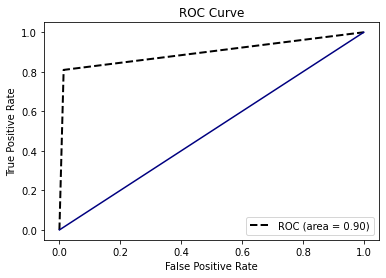

In [422]:
index = 3
x_train = all_M_dict[index]['x_train']
y_train = all_M_dict[index]['y_train']
x_test = all_M_dict[index]['x_test']
y_test = all_M_dict[index]['y_test']

pred = get_maj (3,x_test,y_test)


confusion = confusion_matrix(y_test,pred)

print ('confusion matrix:')
print (confusion)




y_label,y_pre = (y_test,pred)
fpr, tpr, thersholds = roc_curve(y_label, y_pre)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit t predict method.

In [380]:
from sklearn.cluster import SpectralClustering


In [413]:
def Spectral_Clustering (random_number,train_set,true_label):
    ## random_number: iteration of the loop
    ## train_set: pd DateFrame train_set without labels, index reseted
    
    train = train_set
    kmeans = SpectralClustering(random_state= random_number, n_clusters=2, assign_labels = 'kmeans', affinity = 'rbf')
    pred=kmeans.fit_predict(train)
        
    cluster0 = train[pred == 0]
    cluster1 = train[pred == 1]
    
    cluster0_dis = []
    cluster0_index = []
    cluster1_dis = []
    cluster1_index = []
        
    for i in range(cluster0.shape[0]):
        cluster0_dis.append((cluster0.index.tolist()[i]))
        
    for i in range(cluster1.shape[0]):
        cluster1_dis.append((cluster1.index.tolist()[i]))
    
    
    true_label = np.array(true_label)
    label_0 = Counter(true_label[cluster0_dis]).most_common()[0][0]
    label_1 = Counter(true_label[cluster1_dis]).most_common()[0][0]
    
    if label_0 != 0:
        for i,v in enumerate(pred):
            pred[i] = abs(v-1)
        if label_1 != 0:
            return(False)    
    return(pred)

In [414]:
t_accuracy_l = []
t_precision_l=[]
t_recall_l=[]
t_F1_score_l=[]
t_AUC_l= []




for M in range(30):
    print ('try:',M+1)
    x_train = all_M_dict[M]['x_train']
    y_train = all_M_dict[M]['y_train']
    x_test = all_M_dict[M]['x_test']
    y_test = all_M_dict[M]['y_test']
    for rs in range(10):
        print('random_state = ',rs)
        t_pred = Spectral_Clustering(rs,x_train,y_train)
       
       
        
        t_accuracy = accuracy_score (y_train,t_pred)
        t_precision=precision_score (y_train,t_pred)
        t_recall= recall_score (y_train,t_pred)
        t_F1_score= f1_score (y_train,t_pred)
        t_AUC= roc_auc_score (y_train,t_pred)
        t_confusion = confusion_matrix (y_train,t_pred)
        
        print ('training test_accuracy: ',t_accuracy)
        print('training_precision:',t_precision)
        print ('training_recall:',t_recall)
        print ('training_F1_score:',t_F1_score)
        print ('training_AUC:',AUC)
        print ('---')
        
        t_accuracy_l.append (t_accuracy)
        t_precision_l.append (t_precision)
        t_recall_l.append (t_recall)
        t_F1_score_l.append (t_F1_score)
        t_AUC_l.append (t_AUC)

try: 1
random_state =  0
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  1
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  2
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  3
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  4
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.511904761

training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  2
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  3
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  4
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  5
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state 

training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  3
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  4
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  5
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  6
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  7
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  1
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  2
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  3
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  4
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_s

training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  3
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  4
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  5
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  6
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state 

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  4
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  5
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  6
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  7
training test_accuracy:  0.6241758241758242
training_precision: 0.0
training_recall: 0.0
training_F1_score: 0.0
training_AUC: 0.5119047619047619
---
random_state =  8
training test_accuracy:  0.6285714285714286
training_precisi

training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  5
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  6
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  7
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state =  8
training test_accuracy:  0.6307692307692307
training_precision: 1.0
training_recall: 0.011764705882352941
training_F1_score: 0.023255813953488372
training_AUC: 0.5119047619047619
---
random_state 

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  6
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  7
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  8
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  9
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---


In [415]:
t_SL = {}
t_SL ['AVE_accuracy'] = np.mean(t_accuracy_l)
t_SL['AVE_precision']=np.mean(t_precision_l)
t_SL['AVE_recall']=np.mean(t_recall_l)
t_SL['AVE_F1_score']=np.mean(t_F1_score_l)
t_SL['AVE_AUC']=np.mean(t_AUC_l)

print ('Spectral Clustering report over training set',t_SL)

Spectral Clustering report over training set {'AVE_accuracy': 0.6292673992673992, 'AVE_precision': 0.8916666666666667, 'AVE_recall': 0.008392156862745097, 'AVE_F1_score': 0.01661340042612992, 'AVE_AUC': 0.5040030959752322}


confusion matrix:
[[285   0]
 [168   2]]
0.000000 0.000000 2.000000
0.000000 0.011765 1.000000
1.000000 1.000000 0.000000


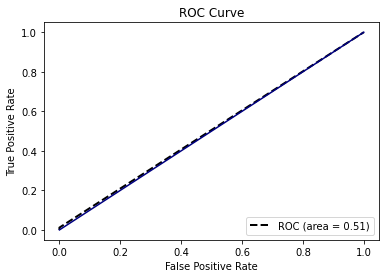

In [406]:
index = 3
x_train = all_M_dict[index]['x_train']
y_train = all_M_dict[index]['y_train']
x_test = all_M_dict[index]['x_test']
y_test = all_M_dict[index]['y_test']

pred = get_maj (3,x_train,y_train)


confusion = confusion_matrix(y_train,pred)

print ('confusion matrix:')
print (confusion)




y_label,y_pre = (y_train,pred)
fpr, tpr, thersholds = roc_curve(y_label, y_pre)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


In [426]:
accuracy_l = []
precision_l= []
recall_l= []
F1_score_l= []
AUC_l=[]



for M in range(30):
    print('TRY = ', 1)
    x_train = all_M_dict[M]['x_train']
    y_train = all_M_dict[M]['y_train']
    x_test = all_M_dict[M]['x_test']
    y_test = all_M_dict[M]['y_test']
    
    for rs in range(20,30):
        print('random_state = ',rs)
        pred = Spectral_Clustering(rs,x_test,y_test)
        
        accuracy = accuracy_score (y_test,pred)
        precision=precision_score (y_test,pred)
        recall= recall_score (y_test,pred)
        F1_score= f1_score (y_test,pred)
        AUC= roc_auc_score (y_test,pred)
        confusion = confusion_matrix(y_test,pred)
    
        print ('training test_accuracy: ',t_accuracy)
        print('training_precision:',t_precision)
        print ('training_recall:',t_recall)
        print ('training_F1_score:',t_F1_score)
        print ('training_AUC:',AUC)
        print ('---')
        
        accuracy_l.append (accuracy)
        precision_l.append (precision)
        recall_l.append (recall)
        F1_score_l.append ( F1_score)
        AUC_l.append (AUC)

TRY =  1
random_state =  20
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.8928571428571428
---
random_state =  21
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.8928571428571428
---
random_state =  22
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.8928571428571428
---
random_state =  23
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.8928571428571428
---
random_state =  24
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC:

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  22
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  23
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  24
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  25
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
rand

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  25
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  26
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  27
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  28
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
rand

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  28
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
random_state =  29
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4791666666666667
---
TRY =  1
random_state =  20
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  21
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4930555555555556
---
random_state =  29
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.4930555555555556
---
TRY =  1
random_state =  20
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5714285714285714
---
random_state =  21
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5714285714285714
---
random_state =  22
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5714285714285714

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  25
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  26
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  27
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  28
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
rand

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  26
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  27
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  28
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  29
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
TRY 

training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  27
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  28
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---
random_state =  29
training test_accuracy:  0.6285714285714286
training_precision: 1.0
training_recall: 0.0058823529411764705
training_F1_score: 0.011695906432748537
training_AUC: 0.5119047619047619
---


In [428]:
SL = {}
SL ['AVE_accuracy'] = np.mean(accuracy_l)
SL['AVE_precision']=np.mean(precision_l)
SL['AVE_recall']=np.mean(recall_l)
SL['AVE_F1_score']=np.mean(F1_score_l)
SL['AVE_AUC']=np.mean(AUC_l)

print ('Spectral Clustering report over test set',SL)

Spectral Clustering report over test set {'AVE_accuracy': 0.6434795321637427, 'AVE_precision': 0.6927430276213461, 'AVE_recall': 0.07698412698412699, 'AVE_F1_score': 0.09990044143030626, 'AVE_AUC': 0.5254596560846561}


confusion matrix:
[[72  0]
 [41  1]]
0.000000 0.000000 2.000000
0.000000 0.023810 1.000000
1.000000 1.000000 0.000000


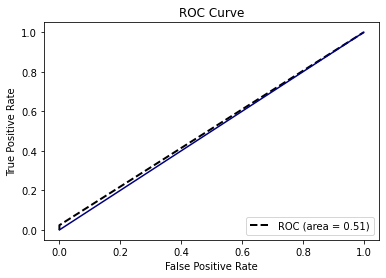

In [425]:
index = 3
x_train = all_M_dict[index]['x_train']
y_train = all_M_dict[index]['y_train']
x_test = all_M_dict[index]['x_test']
y_test = all_M_dict[index]['y_test']

pred = Spectral_Clustering (3,x_test,y_test)


confusion = confusion_matrix(y_test,pred)

print ('confusion matrix:')
print (confusion)




y_label,y_pre = (y_test,pred)
fpr, tpr, thersholds = roc_curve(y_label, y_pre)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Supervised Learning report over training set {'AVE_accuracy': 0.9872527472527473, 'AVE_precision': 0.992217601465984, 'AVE_recall': 0.9735294117647056, 'AVE_F1_score': 0.982763762507396, 'AVE_AUC': 0.9844840041279672}
Supervised Learning report over test set {'AVE_accuracy': 0.9669590643274851, 'AVE_precision': 0.9729060135469664, 'AVE_recall': 0.9373015873015871, 'AVE_F1_score': 0.9542767230988318, 'AVE_AUC': 0.9607804232804233}

Semi-supervised Learning report over training set {'AVE_accuracy': 0.9739926739926741, 'AVE_precision': 0.9690241461084121, 'AVE_recall': 0.9615686274509804, 'AVE_F1_score': 0.9650866462612459, 'AVE_AUC': 0.971486068111455}
Semi-supervised Learning report over test set {'AVE_accuracy': 0.9502923976608186, 'AVE_precision': 0.94152111689421, 'AVE_recall': 0.923015873015873, 'AVE_F1_score': 0.9316028530061147, 'AVE_AUC': 0.9446097883597883}

Unsupervised Learning report over training set {'AVE_accuracy': 0.6296479031172907, 'AVE_precision': 0.8979591836734694, 'AVE_recall': 0.009363745498199278, 'AVE_F1_score': 0.018523606913185508, 'AVE_AUC': 0.5045028537730882}
Unsupervised Learning report over test set {'AVE_accuracy': 0.6292673992673992, 'AVE_precision': 0.8916666666666667, 'AVE_recall': 0.008392156862745097, 'AVE_F1_score': 0.01661340042612992, 'AVE_AUC': 0.5040030959752322}

Spectral Clustering report over training set {'AVE_accuracy': 0.6292673992673992, 'AVE_precision': 0.8916666666666667, 'AVE_recall': 0.008392156862745097, 'AVE_F1_score': 0.01661340042612992, 'AVE_AUC': 0.5040030959752322}
Spectral Clustering report over test set {'AVE_accuracy': 0.6434795321637427, 'AVE_precision': 0.6927430276213461, 'AVE_recall': 0.07698412698412699, 'AVE_F1_score': 0.09990044143030626, 'AVE_AUC': 0.5254596560846561}



On both training and test sets,the result from supervised learning is generally better over others. The second best is semi-supervised. unsupervised learning and spectral clustering perform awful on both traning and test sets.
